# 4.9 Data Visualization with Python

## Contents

## 1. Bar chart
## 2. Histogram
## 3. Scatterplot
## 4. Creating a random sample
## 5. Line chart

In [30]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [31]:
path = r'/Users/sophie/Desktop/CareerFoundry /09 2023 Phython'
path

'/Users/sophie/Desktop/CareerFoundry /09 2023 Phython'

In [32]:
ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data', 'prepared data ', 'ords_prods_merge_flags.pkl'))
pd.options.display.max_columns = None
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_hours,busiest_period_of_day,max_order,loyalty_flag,order_regularity,order regularity flag,average_spend,spending flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,Most orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,Most orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender


## 1. Bar chart

<Axes: xlabel='orders_day_of_week'>

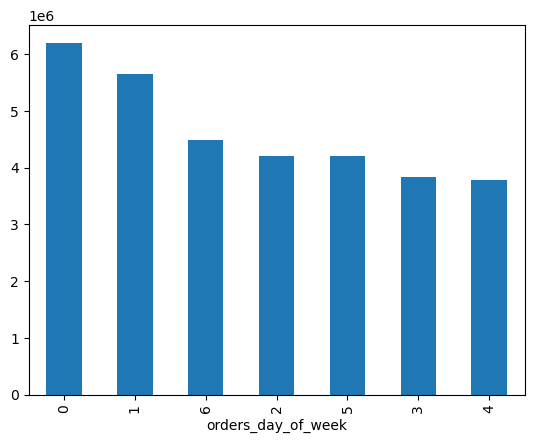

In [33]:
# Create a bar chart
# Bar charts make it easy to determine how the observations in the data set are distributed among the categories of a variable

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

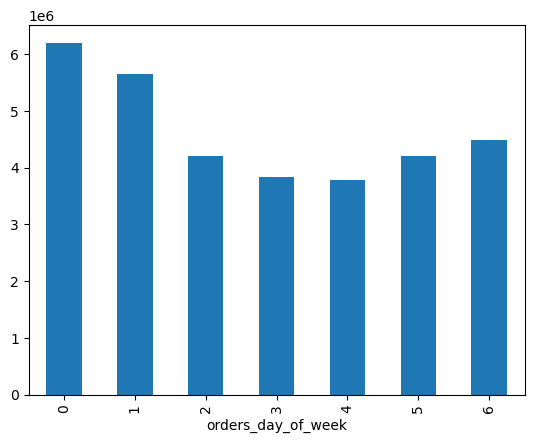

In [34]:
# Sorting differently

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

# Also for frequencies: ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

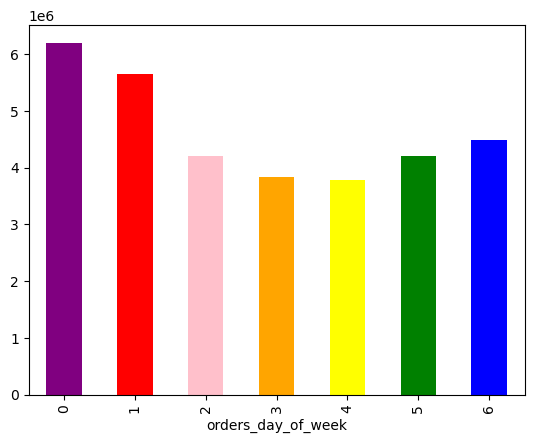

In [35]:
# Adding colors

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])


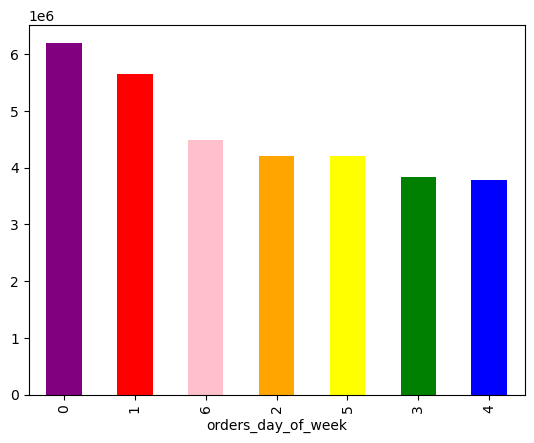

In [36]:
# Exporting
# Save within bar object
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

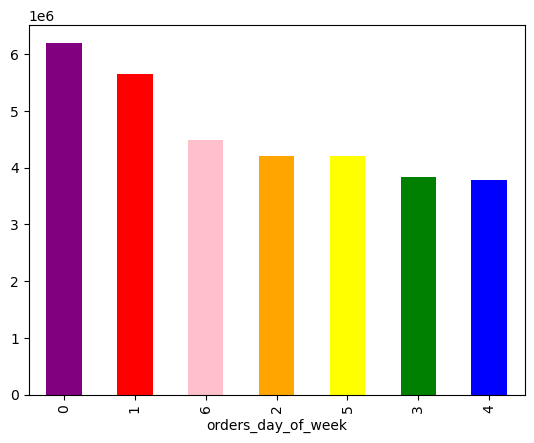

In [37]:
# Access through

bar.figure

In [38]:
# Export it outside of Jupyter in the form of an image file
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow.png'))

## 2. Histogram

<Axes: ylabel='Frequency'>

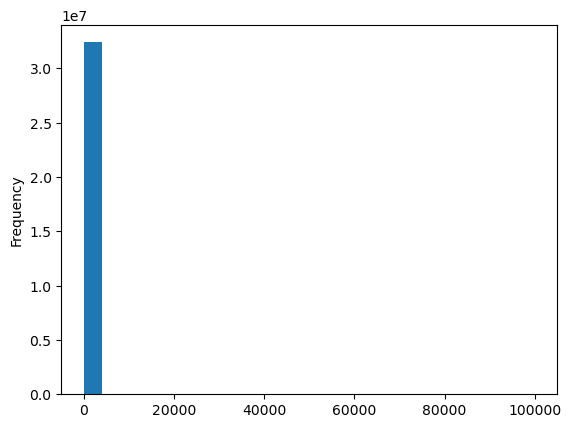

In [39]:
# Creating histograms
# Histograms are used to show the density of a continuous variable
# Distribution of observations per their occurrence in a data set

ords_prods_merge['prices'].plot.hist(bins = 25)

In [56]:
# Looks suspicious

ords_prods_merge['prices'].max()

25.0

## 3. Scatterplot

<function scatterplot at 0x169958040>


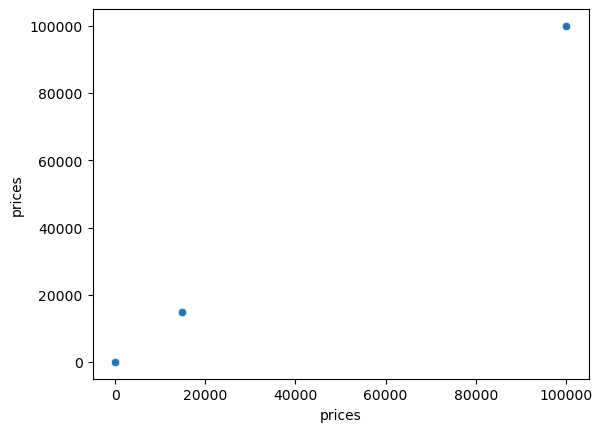

In [41]:
# Try plotting the “prices” column against itself. This will reveal whether there are any outliers.

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)
print(sns.scatterplot)

In [42]:
# Looks suspicious, what about 20.000 value? Run more checks
# Outliers?

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_hours,busiest_period_of_day,max_order,loyalty_flag,order_regularity,order regularity flag,average_spend,spending flag
10030345,912404,17,12,2,14,5.0,False,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Most orders,Most orders,40,Regular customer,5.0,Frequent customer,108.648299,High spender
10030346,603376,17,22,6,16,4.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Average orders,Average orders,40,Regular customer,5.0,Frequent customer,108.648299,High spender
10030347,3264360,135,2,2,21,13.0,False,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Average orders,Average orders,4,New customer,12.0,Regular customer,1154.792308,High spender
10030348,892534,135,3,0,8,12.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest day,Busiest days,Average orders,Average orders,4,New customer,12.0,Regular customer,1154.792308,High spender
10030349,229704,342,8,1,19,30.0,False,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Busiest days,Average orders,Average orders,16,Regular customer,23.0,Non-frequent customer,114.426619,High spender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,False,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Average orders,Average orders,39,Regular customer,4.0,Frequent customer,1106.743956,High spender
29166210,2363282,204099,31,0,9,2.0,False,33664,1,1,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Average orders,Average orders,39,Regular customer,4.0,Frequent customer,1106.743956,High spender
29166211,3181945,204395,13,3,15,8.0,False,33664,25,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Slowest days,Most orders,Most orders,15,Regular customer,5.0,Frequent customer,451.153540,High spender
29166212,2486215,205227,7,3,20,4.0,False,33664,8,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Slowest days,Average orders,Average orders,12,Regular customer,12.0,Regular customer,1178.381871,High spender


In [43]:
# Mark suspicious outliers as NaNs
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [57]:
# Check if successful
ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

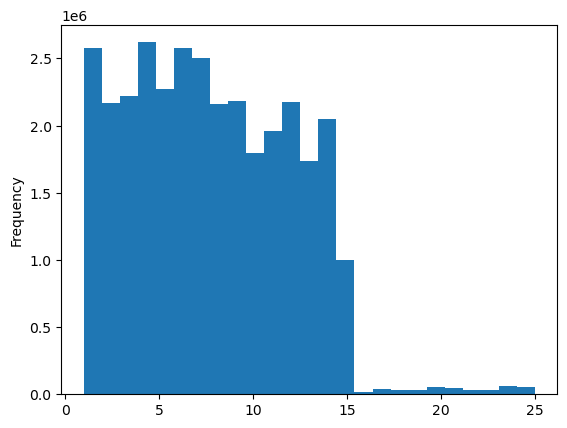

In [58]:
# Check hist again
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

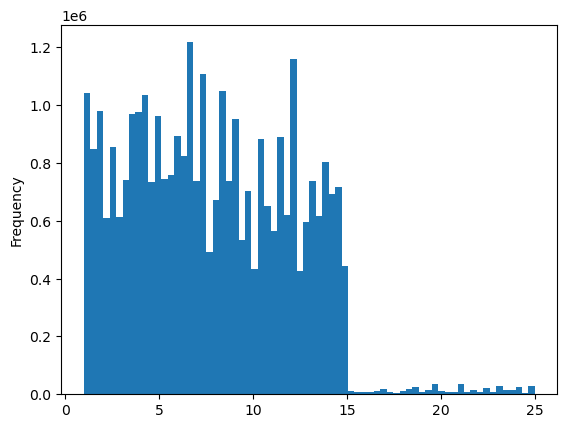

In [46]:
# Increase granularity (increase number of bins)

ords_prods_merge['prices'].plot.hist(bins = 70)

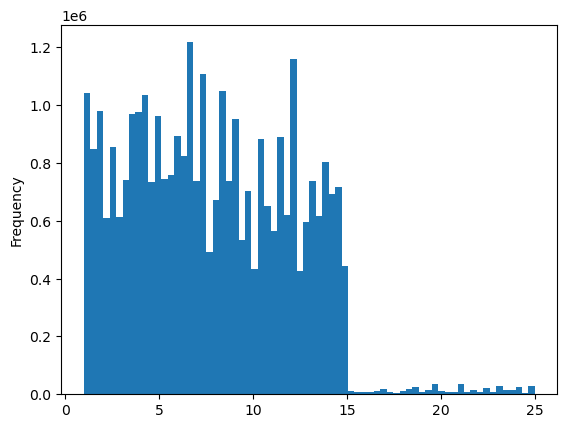

In [47]:
# Exporting histogram

hist = ords_prods_merge['prices'].plot.hist(bins = 70)
hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_prices_dow.png'))

## 4. Creating a random sample

In [48]:
# For a line chart on prices x day of the week, we need a sample, otherwise we would run into RAM/CPU issues

# Creates a reproducible pattern of random floating numbers between 0-1:
# Set the seed for the random number generator.
np.random.seed(4)

# Compares randomly created uniform numbers to 0.7 to create 70/30 subsamples:
# Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
# Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
# Store the results of the test in a new list, dev, in the form of boolean values (True and False).
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [49]:
# 32,434,212 boolean values and a dataframe that’s 32,434,212 rows long
# How can you use your list to split your dataframe into two samples?

# Store 70% in the big data frame, dev = True
big = ords_prods_merge[dev]

# Store 30% in the big data frame, dev = False
small = ords_prods_merge[~dev]

In [51]:
# Check via sums
len(ords_prods_merge)

32404859

In [52]:
len(big) + len(small)

32404859

In [54]:
# To speed up process, reduce sample to necessary columns
df_2 = small[['orders_day_of_week','prices']]
df_2

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0
...,...,...
32404841,1,8.8
32404842,2,8.8
32404843,0,3.7
32404849,3,3.7


## 5. Line chart

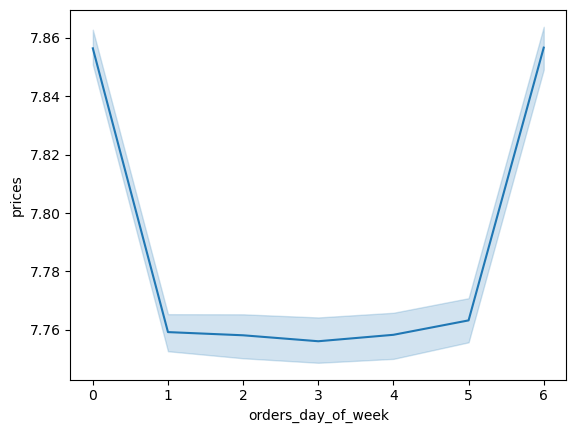

In [55]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [59]:
# Export data to pkl
ords_prods_merge.to_pickle(os.path.join(path, 'Data', 'prepared data ', 'ords_prods_merge_price_clean.pkl'))